Load data into a dataframe:

In [1]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/titanic.csv")

StatementMeta(, 7b8e54d1-1050-460f-83bf-5aabd2be8419, 3, Finished, Available)

### Data Exploration

Display the first rows of the dataframe: 

In [2]:
df.head()

StatementMeta(, 7b8e54d1-1050-460f-83bf-5aabd2be8419, 4, Finished, Available)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Display the summary statistics of the dataframe:

In [3]:
df.describe()

StatementMeta(, 7b8e54d1-1050-460f-83bf-5aabd2be8419, 5, Finished, Available)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,156.000000,156.000000,156.000000,126.000000,156.000000,156.000000,156.000000
mean,78.500000,0.346154,2.423077,28.141508,0.615385,0.397436,28.109587
std,45.177428,0.477275,0.795459,14.613880,1.056235,0.870146,39.401047
min,1.000000,0.000000,1.000000,0.830000,0.000000,0.000000,6.750000
25%,39.750000,0.000000,2.000000,19.000000,0.000000,0.000000,8.003150
50%,78.500000,0.000000,3.000000,26.000000,0.000000,0.000000,14.454200
75%,117.250000,1.000000,3.000000,35.000000,1.000000,0.000000,30.371850
max,156.000000,1.000000,3.000000,71.000000,5.000000,5.000000,263.000000


Display the data types of each column

In [4]:
df.dtypes

StatementMeta(, 7b8e54d1-1050-460f-83bf-5aabd2be8419, 6, Finished, Available)

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

# Data Distribution

StatementMeta(, 7b8e54d1-1050-460f-83bf-5aabd2be8419, 7, Finished, Available)

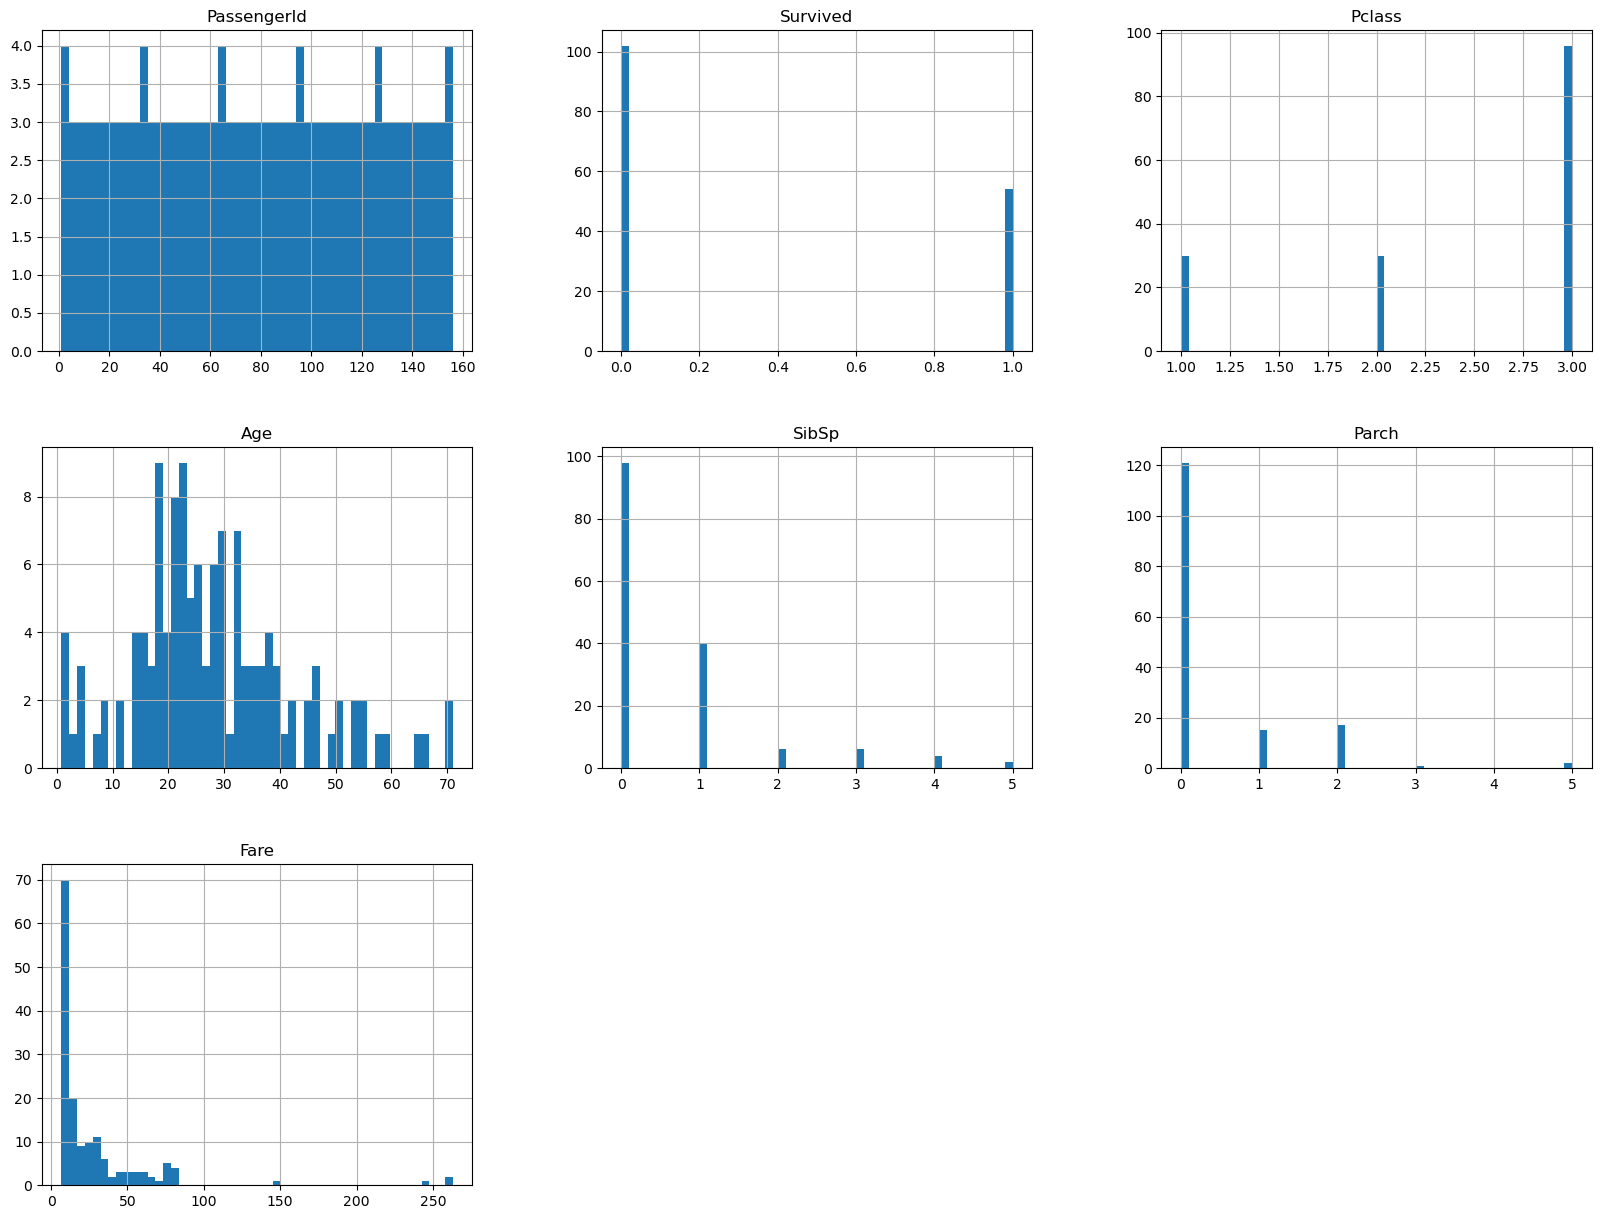

In [5]:
import matplotlib.pyplot as plt

df.hist(bins=50, figsize=(20,15))
plt.show()

please upload to lakehouse

please upload to lakehouse

# Missing data

In [6]:
print(df.isnull().sum())

StatementMeta(, 7b8e54d1-1050-460f-83bf-5aabd2be8419, 8, Finished, Available)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             30
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64


Impute missing values:

In [7]:
median_age = df['Age'].median()
df['Age'].fillna(median_age, inplace = True)

StatementMeta(, 7b8e54d1-1050-460f-83bf-5aabd2be8419, 9, Finished, Available)

In [8]:
print(df.isnull().sum())

StatementMeta(, 7b8e54d1-1050-460f-83bf-5aabd2be8419, 10, Finished, Available)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          125
Embarked         1
dtype: int64


# Data Correlation

Correlation Matrix, excluding categorical columns from the dataframe:

In [10]:
print(df.select_dtypes(include=['number']).corr())

StatementMeta(, 7b8e54d1-1050-460f-83bf-5aabd2be8419, 12, Finished, Available)

             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.192991  0.012208  0.075143 -0.136420 -0.027243   
Survived       -0.192991  1.000000 -0.116340 -0.112114 -0.066943  0.039435   
Pclass          0.012208 -0.116340  1.000000 -0.345158  0.087420  0.016491   
Age             0.075143 -0.112114 -0.345158  1.000000 -0.366484 -0.197654   
SibSp          -0.136420 -0.066943  0.087420 -0.366484  1.000000  0.399040   
Parch          -0.027243  0.039435  0.016491 -0.197654  0.399040  1.000000   
Fare           -0.027122  0.029343 -0.607256  0.032529  0.271997  0.254822   

                 Fare  
PassengerId -0.027122  
Survived     0.029343  
Pclass      -0.607256  
Age          0.032529  
SibSp        0.271997  
Parch        0.254822  
Fare         1.000000  


StatementMeta(, 7b8e54d1-1050-460f-83bf-5aabd2be8419, 14, Finished, Available)

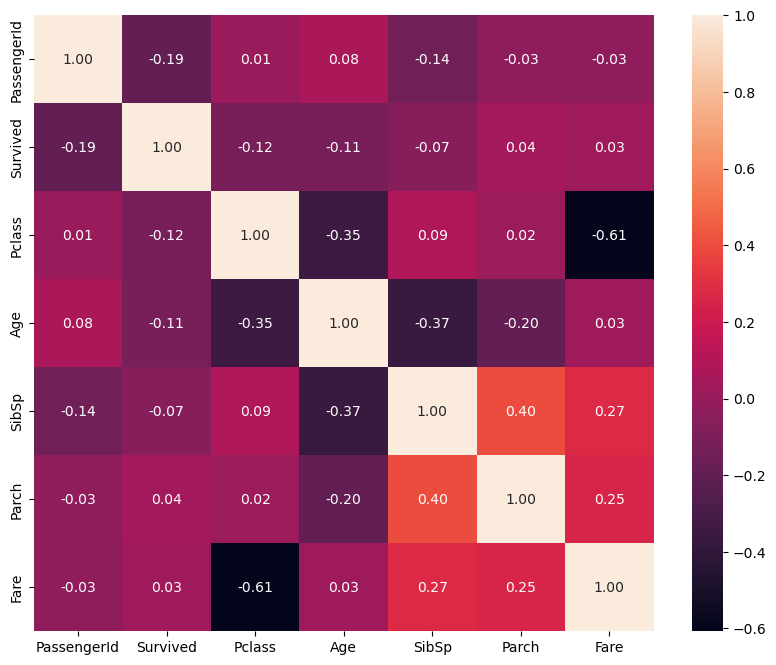

In [12]:
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.select_dtypes(include=['number']).corr(), annot=True, fmt=".2f")
plt.show()

please upload to lakehouse